In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import scipy.io as sio
import os
import pandas as pd
import mediapipe as mp

%matplotlib inline

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# gettig data online
# !wget http://www.cbsr.ia.ac.cn/users/xiangyuzhu/projects/3DDFA/Database/AFLW2000-3D.zip

In [ ]:
# ! unzip /content/AFLW2000-3D.zip

___

# Project Area

### Reading Data

In [5]:
data_path = '/content/drive/MyDrive/colab-data/AFLW2000'

### functions

In [6]:
def get_files_path(data_folder):
    mat_files = []
    pic_files = []
    for i in os.scandir(data_folder):
        if i.path.endswith('mat'):
            mat_files.append(i.path)
            jpg_path = i.path.split('.')[0]
            jpg = jpg_path + '.jpg'
            pic_files.append(jpg)
    return pic_files, mat_files

In [7]:
# creating training data frame 
def creat_landmks(imgs, mats ):
    # creat data frame to hold data
    df = pd.DataFrame(columns = list(range(1,(468*2 )+ 1))+['Yaw','Pitch','Roll'])
    faceModule = mp.solutions.face_mesh
    no_faces_detected = []
    row = 0

   
    for im, mat in zip(imgs,mats):
        data_list = []

        # landmarks part
        with faceModule.FaceMesh(static_image_mode=True) as faces:
            image = cv2.imread( im)
            results = faces.process(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

            results = faces.process(image)
            if results.multi_face_landmarks != None:
                for face in results.multi_face_landmarks:
                    for landmark in face.landmark:
                        data_list.append(landmark.x)
                        data_list.append(landmark.y)
                    f = sio.loadmat(mat)
                    ypr = f['Pose_Para'][0][:3].tolist()
                    data_list = data_list + ypr
                    df.loc[row] = data_list
                    row += 1
            else:
                no_faces_detected.append(im)

    return df , no_faces_detected

In [8]:
def gen_landmarks(image):
    faceModule = mp.solutions.face_mesh
    data_list = []
    count = 0
    with faceModule.FaceMesh(static_image_mode=True) as faces:
            results = faces.process(image)
            if results.multi_face_landmarks != None:
                face = results.multi_face_landmarks[0]
                for landmark in face.landmark:
                    data_list.append(landmark.x)
                    data_list.append(landmark.y)
                    if count == 97:
                        rx = landmark.x * image.shape[1]
                        ry =  landmark.y * image.shape[0]
                    count += 1
    return np.array(data_list).reshape((1,-1)), rx,ry

### Extracting Features 

In [9]:
pics, mats = get_files_path(data_path)

In [10]:
df, no_faces_detected = creat_landmks(pics,mats)

In [11]:
df.shape

(1647, 939)

In [ ]:
df.head()

,1,2,3,4,5,6,7,8,9,10,...,930,931,932,933,934,935,936,Yaw,Pitch,Roll
0,0.496313,0.698371,0.549173,0.626343,0.507370,0.644273,0.527005,0.544208,0.557460,0.603447,...,0.490388,0.535384,0.495480,0.599638,0.493142,0.609433,0.483497,-0.124535,-0.497742,0.199365
1,0.491237,0.658203,0.469893,0.618060,0.492668,0.629728,0.480298,0.575373,0.468601,0.605743,...,0.547652,0.531594,0.550081,0.605889,0.548045,0.615036,0.542168,-0.375663,0.824710,0.001752
2,0.502365,0.710217,0.501160,0.652415,0.501180,0.662648,0.479966,0.566886,0.500702,0.630570,...,0.482579,0.534867,0.491237,0.660965,0.449951,0.670790,0.441736,-0.212288,0.012070,0.002363
3,0.488142,0.680686,0.480419,0.604327,0.485775,0.631100,0.464630,0.541913,0.480297,0.582883,...,0.505817,0.536975,0.507800,0.677132,0.501524,0.691490,0.485994,0.093373,0.062462,-0.125822
4,0.549441,0.647286,0.583336,0.605030,0.547696,0.619414,0.558560,0.559751,0.586871,0.590823,...,0.514283,0.539662,0.519174,0.552267,0.497743,0.553062,0.491826,-0.379067,-0.985426,0.086955


In [ ]:
df.describe()

,1,2,3,4,5,6,7,8,9,10,...,930,931,932,933,934,935,936,Yaw,Pitch,Roll
count,1854.000000,1854.000000,1854.000000,1854.000000,1854.000000,1854.000000,1854.000000,1854.000000,1854.000000,1854.000000,...,1854.000000,1854.000000,1854.000000,1854.000000,1854.000000,1854.000000,1854.000000,1854.000000,1854.000000,1854.000000
mean,0.504974,0.666170,0.503558,0.611046,0.504428,0.627604,0.490054,0.550930,0.503261,0.592946,...,0.503183,0.530816,0.507360,0.620993,0.485578,0.629459,0.478070,-0.097768,0.014203,-0.033685
std,0.041306,0.028242,0.053299,0.029096,0.037849,0.024661,0.044542,0.023852,0.054840,0.028700,...,0.022764,0.033821,0.022192,0.047252,0.038826,0.049869,0.041043,0.563254,0.581209,0.662673
min,0.257245,0.179205,0.227617,0.144553,0.250123,0.152425,0.222787,0.100573,0.223512,0.131748,...,0.056270,0.266590,0.060963,0.303348,0.032842,0.293200,0.024885,-12.457202,-6.130066,-16.969362
25%,0.482047,0.652269,0.469344,0.598233,0.481901,0.617087,0.459887,0.540759,0.466569,0.579942,...,0.491317,0.514130,0.496232,0.592881,0.463239,0.601068,0.454514,-0.246636,-0.256665,-0.160724
50%,0.505102,0.668859,0.501479,0.614621,0.503650,0.629947,0.485406,0.552387,0.501256,0.596391,...,0.502089,0.532241,0.506312,0.626009,0.485257,0.634794,0.477661,-0.123219,0.019702,-0.018098
75%,0.526500,0.682793,0.537310,0.627779,0.525601,0.641246,0.516571,0.562962,0.538754,0.609392,...,0.513961,0.546394,0.517922,0.649987,0.506481,0.660666,0.499969,0.030099,0.305822,0.125462
max,0.928412,0.799192,0.929010,0.776531,0.923675,0.782021,0.901439,0.746027,0.925885,0.767880,...,0.720719,0.908653,0.723223,0.990539,0.746455,0.998641,0.754913,15.598820,3.277500,5.829394


In [12]:
df.to_csv('opencv_traing_data.csv',index = False)

# Modeling Part

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.multioutput import MultiOutputRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [14]:
x = df.drop(columns= ['Pitch', 'Yaw','Roll'])
y = df[['Yaw','Pitch','Roll']]

# x = features
# sts = StandardScaler()
# x = sts.fit_transform(features)
# pca = PCA(n_components= .95)
# x = pca.fit_transform(features)

In [16]:
x_train, x_val, y_train, y_val = train_test_split(x,y, random_state=0, test_size=.15)

### Base Model

In [17]:
model = MultiOutputRegressor(RandomForestRegressor())
model.fit(x_train, y_train)
model.score(x_val, y_val)

0.7222770435983138

## Tuning more models

In [18]:
model2 = MultiOutputRegressor(SVR())
model2.fit(x_train, y_train)
model2.score(x_val, y_val)

0.829193736459595

In [19]:
from sklearn.model_selection import GridSearchCV

In [20]:
parm_grid = {'estimator__epsilon': range(6),'estimator__C':np.logspace(-3,2,10), 'estimator__gamma':['scale','auto'] }
gs = GridSearchCV(MultiOutputRegressor(SVR()),param_grid= parm_grid )


In [21]:
gs.fit(x_train,y_train)
gs.score(x_val,y_val)

0.84644099053213

## savig trained model

In [24]:
import joblib

In [25]:
joblib.dump(gs, 'my_model.pkl')

['my_model.pkl']

In [23]:
import xgboost as xgb
model3 = MultiOutputRegressor(xgb.XGBRegressor(booster = 'gbtree', objective='reg:squarederror' ))
model3.fit(x_train,y_train)
model3.score(x_val, y_val)

0.8324029453588734

# Testing the Model

In [30]:
import os,cv2,math,glob,random
import scipy.io as sio
from math import cos, sin
from pathlib import Path

def draw_axis(img, pitch,yaw,roll,tdx=None, tdy=None, size = 100):

    yaw = -yaw
    if tdx != None and tdy != None:
        tdx = tdx
        tdy = tdy
    else:
        height, width = img.shape[:2]
        tdx = width / 2
        tdy = height / 2

    # shape = img.shape 
    # tdx = int(x * shape[1])
    # tdy = int(y * shape[0])
    # X-Axis pointing to right. drawn in red
    x1 = size * (cos(yaw) * cos(roll)) + tdx
    y1 = size * (cos(pitch) * sin(roll) + cos(roll) * sin(pitch) * sin(yaw)) + tdy

    # Y-Axis | drawn in green
    #        v
    x2 = size * (-cos(yaw) * sin(roll)) + tdx
    y2 = size * (cos(pitch) * cos(roll) - sin(pitch) * sin(yaw) * sin(roll)) + tdy

    # Z-Axis (out of the screen) drawn in blue
    x3 = size * (sin(yaw)) + tdx
    y3 = size * (-cos(yaw) * sin(pitch)) + tdy

    cv2.line(img, (int(tdx), int(tdy)), (int(x1),int(y1)),(0,0,255),3) # red
    cv2.line(img, (int(tdx), int(tdy)), (int(x2),int(y2)),(0,255,0),3) # green
    cv2.line(img, (int(tdx), int(tdy)), (int(x3),int(y3)),(255,0,0),2) # blue

    return img # cv2.cvtColor(img, cv2.COLOR_BGR2RGB) if i read the file w

In [41]:
from google.colab.patches import cv2_imshow

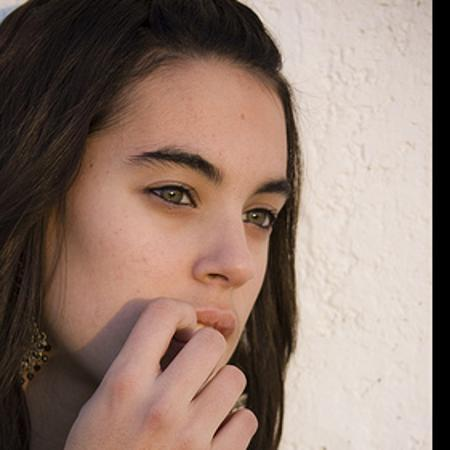

In [45]:
# my_pic = plt.imread('/content/my-pic.jpg')
# my_pic = plt.imread('/content/2022-06-13-185239.jpg')
# my_pic = plt.imread('/content/2022-06-14-111458.jpg')
# # my_pic = plt.imread('/content/2022-06-14-112540.jpg')
# my_pic = plt.imread('/content/2022-06-14-112709.jpg')
my_pic = cv2.imread('/content/drive/MyDrive/colab-data/AFLW2000/image03227.jpg')
cv2_imshow(my_pic)
# plt.imshow(my_pic)

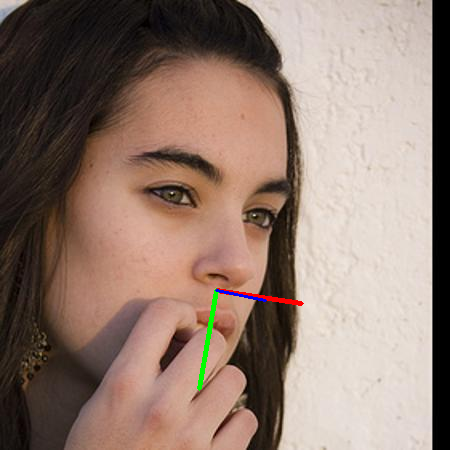

In [46]:
lmks ,rx,ry= gen_landmarks(my_pic)
p,y, r = gs.predict(lmks)[0]
cv2_imshow(draw_axis(my_pic,p,y, r,rx,ry))

___